In [197]:
# ASSIGNMENT 1

In [198]:
# Problem 1

In [199]:
# (a)
import numpy as np

In [200]:
# (b)
import matplotlib.pyplot as plt

In [201]:
# (c)
S = []
n = 3650
dt = 1.0 / 365.0
sdt = np.sqrt(dt)
mu = 0.06
sig = 0.2
mudt = mu * dt
sig2dt = sig * sig * dt 
dz = np.random.randn(n)*sdt
S = 100 * np.exp(np.cumsum(mudt - 0.5*sig2dt + sig * dz))

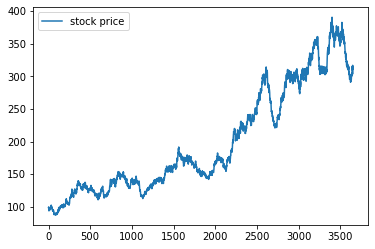

In [202]:
# (d)
plt.plot(S, label='stock price')
plt.legend()
plt.show()

In [209]:
# (e)
logret = np.log(S[1:n]/S[0:n-1])

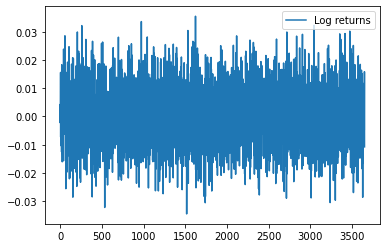

In [137]:
# (f)
plt.plot(logret, label = 'Log returns')
plt.legend()
plt.show()

In [138]:
# (g)
print('the annualized estimated mean log-return is','{:05.3f}'.format(np.mean(logret)/dt))
print('the annualized estimated log-return standard deviation is',
      '{:05.3f}'.format(np.std(logret)/sdt))

the annualized estimated mean log-return is 0.168
the annualized estimated log-return standard deviation is 0.199


In [139]:
# Problem 2
#mean = (np.mean(logret)/dt -mu)/mu
#std = np.std(logret)/sdt - sig
#mean

In [140]:
# (a)
import pandas as pd

In [141]:
# (b)
prng = pd.period_range('1950-01-01','2021-12-31', freq='D')
n = len(prng)
dt = 1.0 / 365.0
sdt = np.sqrt(dt)
mu = 0.06
sig = 0.2
mudt = mu * dt
sig2dt = sig * sig * dt 
dz = np.random.randn(n)*sdt
S = pd.Series(100 * np.exp(np.cumsum(mudt - 0.5*sig2dt + sig * dz)), prng) 

The sample has 26298 observations.


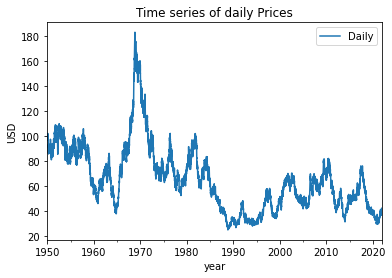

In [142]:
# (c)
n1 = len(S)
print('The sample has {} observations.'.format(n1))
S.plot(label='Daily')
plt.title('Time series of daily Prices')
plt.ylabel('USD')
plt.xlabel('year')
plt.legend()
plt.show()

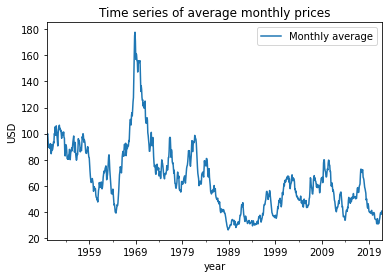

...in this case we are plotting only the 864 average monthly prices.


In [143]:
# (d)
S.resample('M').mean().plot(label='Monthly average')

# (e)
plt.title('Time series of average monthly prices')
plt.ylabel('USD')
plt.xlabel('year')
plt.legend()
plt.show()

print('...in this case we are plotting only the {} average monthly prices.'
      .format(len(S.resample('M').mean())))

In [144]:
# Problem 3

In [145]:
# (a)
wS = S.resample('W').last()
mS = S.resample('M').last()

dlogret = np.log(S/S.shift(1))
wlogret = np.log(wS/wS.shift(1))
mlogret = np.log(mS/mS.shift(1))

In [146]:
# (b)
data = np.concatenate((dlogret.describe().to_numpy(), 
                       wlogret.describe().to_numpy(),mlogret.describe().to_numpy()))
data = data.reshape(3,8).T
pd.DataFrame(data, columns=["Daily", "Weekly","Monthly"],
             index=['count','mean','std','min','25%','50%','75%','max'])

,Daily,Weekly,Monthly
count,26297.000000,3757.000000,863.000000
mean,-0.000035,-0.000243,-0.001086
std,0.010449,0.027192,0.057996
min,-0.043042,-0.100546,-0.178793
25%,-0.007089,-0.018755,-0.039761
50%,-0.000034,0.000014,-0.001648
75%,0.006995,0.018028,0.034591
max,0.043317,0.088314,0.200986


In [147]:
#dlogret.describe()

In [148]:
#wS.describe()

In [149]:
#mS.describe()

In [150]:
# (c)
# daily 
dt = 1.0 / 365.0
sdt = np.sqrt(dt)
dm = np.mean(dlogret)/dt
dsd = np.std(dlogret)/sdt

# weekly
dt = 7.0 / 365.0
sdt = np.sqrt(dt)
wm = np.mean(wlogret)/dt
wsd = np.std(wlogret)/sdt

#monthly 
dt = 1.0 / 12.0
sdt = np.sqrt(dt)
mm = np.mean(mlogret)/dt
msd = np.std(mlogret)/sdt

data = [[dm,wm,mm],[dsd,wsd,msd]]
pd.DataFrame(data, columns=["Daily","Weekly","Monthly"], 
             index=["ann. mean of log-return",
                    "ann. standard deviation of log-returns"])

,Daily,Weekly,Monthly
ann. mean of log-return,-0.012662,-0.012661,-0.013029
ann. standard deviation of log-returns,0.199620,0.196327,0.200787


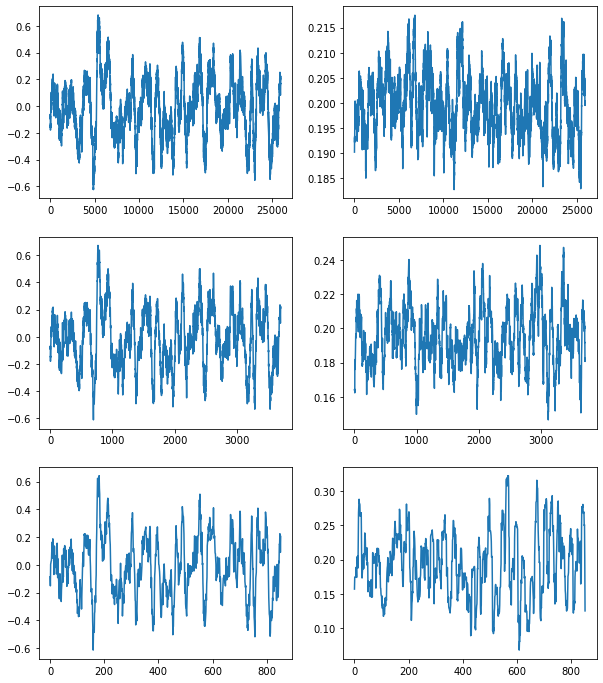

In [151]:
# (d)

num_row, num_cols = 3 , 2
fig, ax = plt.subplots(num_row, num_cols, figsize=(10,12))



roll_S = dlogret.rolling(365).mean()*365
roll_S = roll_S.dropna()
ax[0,0].plot(roll_S.to_numpy())
roll_wS = wlogret.rolling(52).mean()*52
roll_wS = roll_wS.dropna()
ax[1,0].plot(roll_wS.to_numpy())
roll_mS = mlogret.rolling(12).mean()*12
roll_mS = roll_mS.dropna()
ax[2,0].plot(roll_mS.to_numpy())

roll_S = dlogret.rolling(365).std()*np.sqrt(365)
roll_S = roll_S.dropna()
ax[0,1].plot(roll_S.to_numpy())
roll_wS = wlogret.rolling(52).std()*np.sqrt(52)
roll_wS = roll_wS.dropna()
ax[1,1].plot(roll_wS.to_numpy())
roll_mS = mlogret.rolling(12).std()*np.sqrt(12)
roll_mS = roll_mS.dropna()
ax[2,1].plot(roll_mS.to_numpy())
#wS.rolling()
#mS.rolling()
#type(S.rolling(365))
#len(roll_S)

# (e)

#The graph from annualized means are thicker compared to weekly and monthly means.
#The annualized standard deviation fluctuate more when the sample frequency decreases.
# Infact in the daily sampling the fluctuations of the standard deviation lies in the range 
# [0.0095, 0.0115] while in the monthly sampling fluctuation are larger and stay in the 
#interval [0.02 , 0.07]

In [152]:
# (f)

m = dlogret.resample('Y').mean()*365
mean_m = m.mean()
var_m = m.std()**2

dlogretsq = dlogret**2
v = dlogretsq.resample('Y').mean()*365
mean_v = v.mean()
var_v = v.std()**2

ySm = mlogret.resample('Y').mean()*12
meanm = ySm.mean()
varm = ySm.std()**2


mlogretsq = mlogret**2
v = mlogretsq.resample('Y').mean()*12

meanv = v.mean()
varv = v.std()**2


In [153]:
meanm

-0.013137629862902794

In [154]:
mean_m

-0.012670673462621974

In [155]:
mean_v

0.03984846612284254

In [156]:
meanv

0.04031182428316439

In [157]:
varm

0.0496047008489493

In [158]:
var_m

0.04944881163203597

In [159]:
varv

0.000330420144204793

In [160]:
var_v

4.55827095606206e-06

In [161]:
# 0.2**2 + (0.06**2) / 365 - mean_v

In [162]:
0.2**2 + (0.06**2) / 12

0.04030000000000001

In [163]:
# Problem 4

In [225]:
# (a)
import wrds
db = wrds.Connection(wrds_username='edoard')

Loading library list...
Done


In [244]:
# (b)
aapl=db.raw_sql("select  date, ret "
           "from crsp.dsf "
           "where permco in (7) "
           "and date>='2001-01-01'"
            "and date<='2021-12-31'")
gs=db.raw_sql("select  date, ret "
           "from crsp.dsf "
           "where permco in (35048) "
           "and date>='2001-01-01'"
            "and date<='2021-12-31'")
msft=db.raw_sql("select  date, ret "
           "from crsp.dsf "
           "where permco in (8048) "
           "and date>='2001-01-01'"
            "and date<='2021-12-31'")
pg=db.raw_sql("select  date, ret "
           "from crsp.dsf "
           "where permco in (21446) "
           "and date>='2001-01-01'"
            "and date<='2021-12-31'")
ge=db.raw_sql("select  date, ret "
           "from crsp.dsf "
           "where permco in (20792) "
           "and date>='2001-01-01'"
            "and date<='2021-12-31'")


# (c)
#Dataframe.to_csv()
aapl["ret"]=(aapl["ret"]+1) 
aapl["ret"]=aapl["ret"].cumprod()
aapl=aapl.rename(index=aapl["date"], columns={"ret": "AAPL"})


gs["ret"]=(gs["ret"]+1) 
gs["ret"]=gs["ret"].cumprod()
gs=gs.rename(index=gs["date"], columns={"ret": "GS"})


msft["ret"]=(msft["ret"]+1) 
msft["ret"]=msft["ret"].cumprod()
msft=msft.rename(index=msft["date"], columns={"ret": "MSFT"})


pg["ret"]=(pg["ret"]+1) #get gross return
pg["ret"]=pg["ret"].cumprod()
pg=pg.rename(index=pg["date"], columns={"ret": "PG"})


ge["ret"]=(ge["ret"]+1)
ge["ret"]=ge["ret"].cumprod()
ge=ge.rename(index=ge["date"], columns={"ret": "GE"})


table = pd.merge(aapl,gs,on='date')
table = pd.merge(table,msft,on='date')
table = pd.merge(table,pg,on='date')
S_real = pd.merge(table,ge,on='date')
S_real['date']=pd.to_datetime(S_real['date'], format='%Y-%m-%d')
S_real=S_real.set_index('date')
S_real.to_csv('data.csv', sep=';', index=True)

#(d)
data = pd.read_csv('data.csv', sep=';')
data['date']=pd.to_datetime(data['date'])
data = data.set_index('date')
data

,AAPL,GS,MSFT,PG,GE
date,,,,,
2001-01-02,1.000000,0.937463,1.000000,1.000797,0.912647
2001-01-03,1.100840,1.080070,1.105187,0.951394,0.997392
2001-01-04,1.147059,1.054354,1.116715,0.921912,1.002608
2001-01-05,1.100840,1.008767,1.132565,0.955378,0.986962
2001-01-08,1.113445,0.994740,1.128242,0.976096,0.950456
...,...,...,...,...,...
2021-12-27,791.928014,4.687186,24.956950,7.287670,0.457201
2021-12-28,787.360766,4.681992,24.869496,7.326814,0.460487
2021-12-29,787.756056,4.664961,24.920511,7.387556,0.458022


In [245]:
#data['AAPL']

In [246]:
# (e)
# rep.3(a)
d_data = data.resample('D').last()
w_data = data.resample('W').last()
m_data = data.resample('M').last()

dlogret = np.log(d_data/d_data.shift(1))
wlogret = np.log(w_data/w_data.shift(1))
mlogret = np.log(m_data/m_data.shift(1))

In [247]:
dlogret.describe()

,AAPL,GS,MSFT,PG,GE
count,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000
mean,0.000756,0.000445,0.000646,0.000406,0.000018
std,0.022509,0.021478,0.017964,0.011840,0.020492
min,-0.188396,-0.149849,-0.124578,-0.091428,-0.136841
25%,-0.009608,-0.009714,-0.007734,-0.004984,-0.008535
50%,0.000426,0.000142,0.000358,0.000428,0.000000
75%,0.011811,0.010556,0.008951,0.005844,0.008506
max,0.123608,0.183864,0.132929,0.113409,0.179844


In [248]:
wlogret.describe()

,AAPL,GS,MSFT,PG,GE
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,0.005994,0.001390,0.002808,0.001865,-0.000704
std,0.047950,0.047509,0.035513,0.023979,0.044606
min,-0.278471,-0.365644,-0.202276,-0.175977,-0.228878
25%,-0.020959,-0.022453,-0.015644,-0.009496,-0.019237
50%,0.007706,0.003336,0.002824,0.002433,-0.000325
75%,0.033908,0.025723,0.021769,0.015102,0.020979
max,0.236207,0.393197,0.149357,0.122933,0.309399


In [249]:
mlogret.describe()

,AAPL,GS,MSFT,PG,GE
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.025039,0.005847,0.011383,0.008283,-0.002958
std,0.100412,0.086282,0.067844,0.042958,0.086673
min,-0.399818,-0.321603,-0.178358,-0.123464,-0.324090
25%,-0.032658,-0.050239,-0.034680,-0.018434,-0.043401
50%,0.041618,0.015374,0.018394,0.009023,-0.003726
75%,0.092503,0.058163,0.053499,0.034465,0.043256
max,0.301776,0.210329,0.222736,0.123469,0.316246


In [254]:
# rep.3(c)
# daily 
dt = 1.0 / 252.0
sdt = np.sqrt(dt)
dm = np.mean(dlogret)/dt
dsd = np.std(dlogret)/sdt


data = [dm,dsd]
pd.DataFrame(data, columns=["AAPL","GS","MSFT","PG","GE"], 
             index=["ann. mean of log-return",
                    "ann. standard deviation of log-returns"])
#dm
#dsd

,AAPL,GS,MSFT,PG,GE
ann. mean of log-return,0.190481,0.112085,0.162734,0.102390,0.004490
ann. standard deviation of log-returns,0.357276,0.340909,0.285127,0.187931,0.325269


In [255]:
# weekly
dt = 7.0 / 365.0
sdt = np.sqrt(dt)
wm = np.mean(wlogret)/dt
wsd = np.std(wlogret)/sdt


data = [wm,wsd]
pd.DataFrame(data, columns=["AAPL","GS","MSFT","PG","GE"], 
             index=["ann. mean of log-return",
                    "ann. standard deviation of log-returns"])

,AAPL,GS,MSFT,PG,GE
ann. mean of log-return,0.312523,0.072469,0.146410,0.097225,-0.036719
ann. standard deviation of log-returns,0.346089,0.342904,0.256322,0.173074,0.321951


In [256]:
#monthly 
dt = 1.0 / 12.0
sdt = np.sqrt(dt)
mm = np.mean(mlogret)/dt
msd = np.std(mlogret)/sdt


data = [mm,msd]
pd.DataFrame(data, columns=["AAPL","GS","MSFT","PG","GE"], 
             index=["ann. mean of log-return",
                    "ann. standard deviation of log-returns"])

,AAPL,GS,MSFT,PG,GE
ann. mean of log-return,0.300472,0.070169,0.136593,0.099393,-0.035499
ann. standard deviation of log-returns,0.347145,0.298293,0.234551,0.148515,0.299645


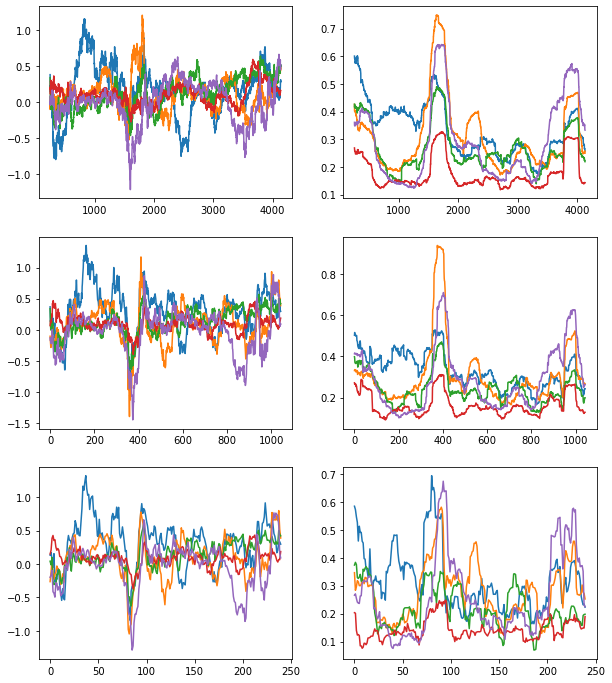

In [263]:
# rep.3(d)
num_row, num_cols = 3 , 2
fig, ax = plt.subplots(num_row, num_cols, figsize=(10,12))



roll_S = dlogret.dropna()
roll_S = roll_S.rolling(252).mean()*252
ax[0,0].plot(roll_S.to_numpy())
roll_wS = wlogret.rolling(52).mean()*52
roll_wS = roll_wS.dropna()
ax[1,0].plot(roll_wS.to_numpy())
roll_mS = mlogret.rolling(12).mean()*12
roll_mS = roll_mS.dropna()
ax[2,0].plot(roll_mS.to_numpy())

roll_S = dlogret.dropna()
roll_S = roll_S.rolling(252).std()*np.sqrt(252)
ax[0,1].plot(roll_S.to_numpy())
roll_wS = wlogret.rolling(52).std()*np.sqrt(52)
roll_wS = roll_wS.dropna()
ax[1,1].plot(roll_wS.to_numpy())
roll_mS = mlogret.rolling(12).std()*np.sqrt(12)
roll_mS = roll_mS.dropna()
ax[2,1].plot(roll_mS.to_numpy())

# (f)

In [ ]:
num_row, num_cols = 5 , 2
fig, ax = plt.subplots(num_row, num_cols, figsize=(10,12))



roll_S = dlogret.dropna()
roll_S = roll_S.rolling(252).mean()*252
ax[0,0].plot(roll_S.to_numpy())
roll_wS = wlogret.rolling(52).mean()*52
roll_wS = roll_wS.dropna()
ax[1,0].plot(roll_wS.to_numpy())
roll_mS = mlogret.rolling(12).mean()*12
roll_mS = roll_mS.dropna()
ax[2,0].plot(roll_mS.to_numpy())

roll_S = dlogret.dropna()
roll_S = roll_S.rolling(252).std()*np.sqrt(252)
ax[0,1].plot(roll_S.to_numpy())
roll_wS = wlogret.rolling(52).std()*np.sqrt(52)
roll_wS = roll_wS.dropna()
ax[1,1].plot(roll_wS.to_numpy())
roll_mS = mlogret.rolling(12).std()*np.sqrt(12)
roll_mS = roll_mS.dropna()
ax[2,1].plot(roll_mS.to_numpy())

In [269]:
a = dlogret['AAPL'].dropna()

In [270]:
b = wlogret['AAPL'].dropna()

In [271]:
c = mlogret['AAPL'].dropna()

In [281]:
table = pd.merge(a.to_frame(),b.to_frame(),on='date')
print(table)
table = pd.merge(table,c.to_frame(),on='date')
table

Empty DataFrame
Columns: [AAPL_x, AAPL_y]
Index: []


,AAPL_x,AAPL_y,AAPL
date,,,


In [274]:
type(b)

pandas.core.series.Series

In [282]:
type(a.to_frame())

pandas.core.frame.DataFrame